<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주성분 분석을 이용해서 차원(특성 수)를 줄일 수 있다. 차원을 축소하게 되면 훈련속도가 빨라지고 성능을 향상시킬 수 도 있다.



In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-02-14 05:15:55--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-02-14 05:15:55--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-02-14 05:15:56--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
#pca로 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components = 50) #1000차원 -> 50차원으로 줄임
pca.fit(fruits_2d)
print('(주성분 갯수, 각주성분의 차원)')
print(pca.components_.shape) #주성분의 차원은 1000차원 그대로임

(주성분수, 주성분의 차원)
(50, 10000)


In [6]:
import matplotlib.pyplot as plt

#그림을 그려주는 함수
def draw_fruits(arr,ratio=1):
  n = len(arr) #샘플수
  row = int(np.ceil(n/10))
  col = n if row < 2 else 10

  fit,axs = plt.subplots(row, col, figsize = (col*ratio, row*ratio), squeeze = False)

  for r in range(row):
    for c in range(col):
      if(r*10 + c < n):
        axs[r,c].imshow(arr[r*10 + c], cmap = 'gray_r')
      axs[r, c].axis('off')

  plt.show()

<주성분들>


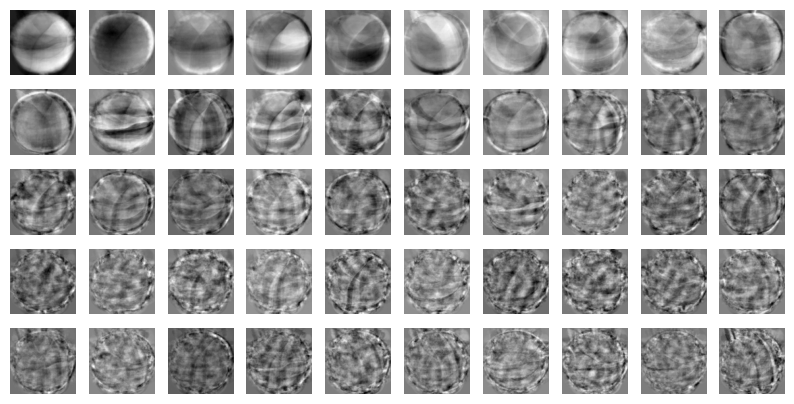

<설명된 분산>


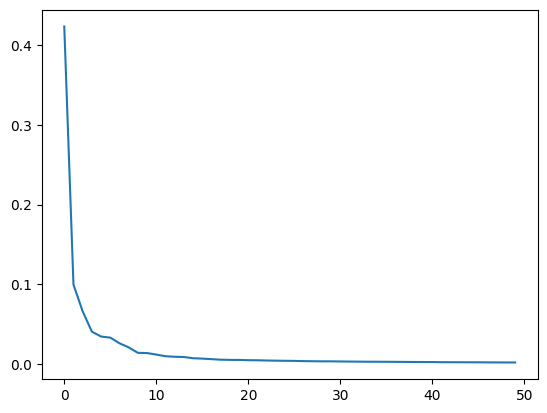

총합:
0.921538604072912


In [8]:
print('<주성분들>')
draw_fruits(pca.components_.reshape(-1, 100, 100))

print('<설명된 분산>')
plt.plot(pca.explained_variance_ratio_)
plt.show()
print('총합:')
print(np.sum(pca.explained_variance_ratio_))

In [9]:
#원본 데이터를 차원축소 하자

fruits_pca = pca.transform(fruits_2d)
print('<차원 축소 후>')
print('(샘플수, 특성수): ',fruits_pca.shape)

<차원 축소 후>
(샘플수, 특성수):  (300, 50)


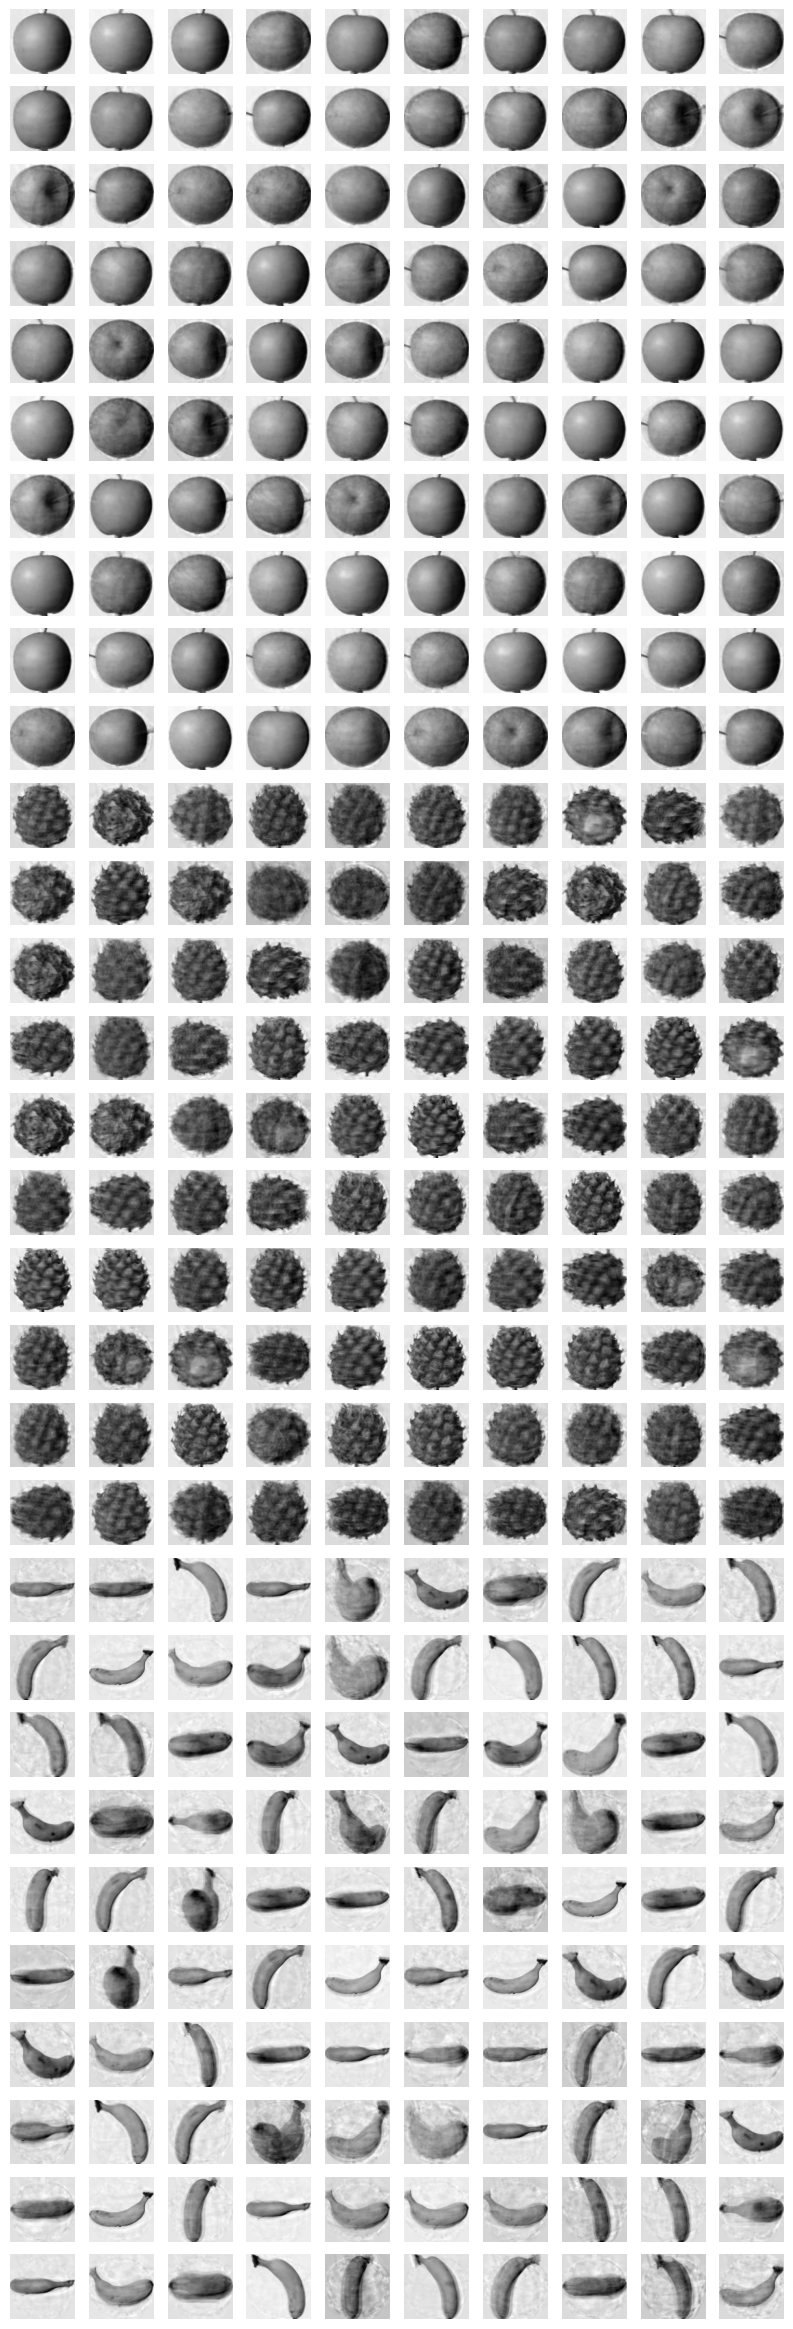

In [10]:
#축소후 다시 원본 복원
fruits_inverse = pca.inverse_transform(fruits_pca)

draw_fruits(fruits_inverse.reshape(-1, 100, 100))

차원 축소된 데이터로 지도학습(로지스틱 회기)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.026823759078979492


In [13]:
#특성의 갯수가 아닌 설명된 분산의 정도를 정해줄 수 도 있음

pca = PCA(n_components = 0.5) #분산의 반만 설명할수 있도록 특성갯수를 잡음
pca.fit(fruits_2d)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


차원 축소된 데이터로 비지도 학습(k평균)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


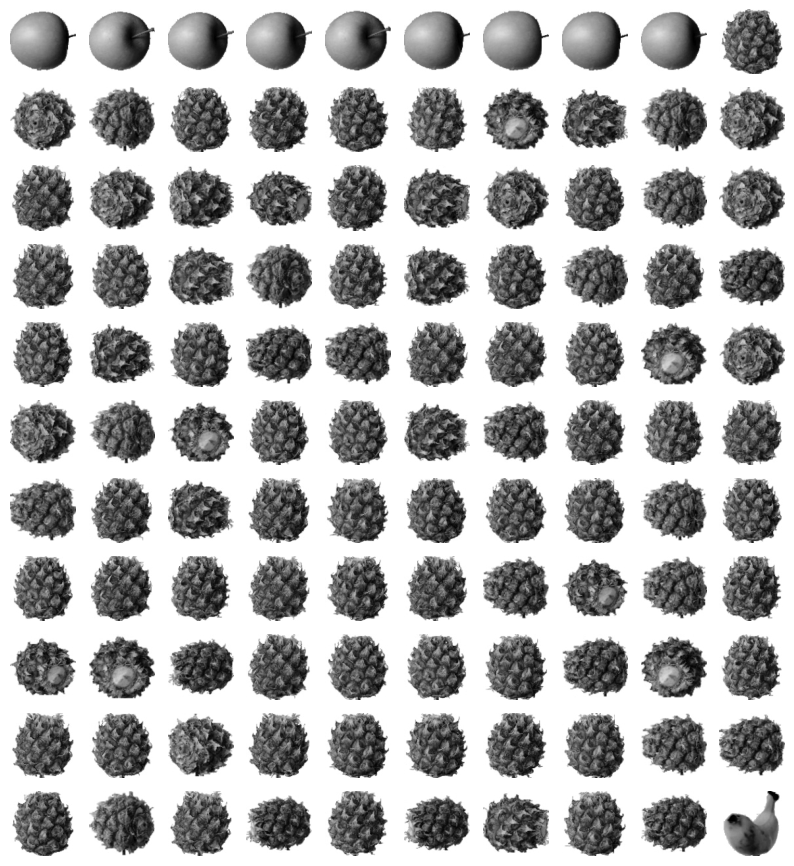

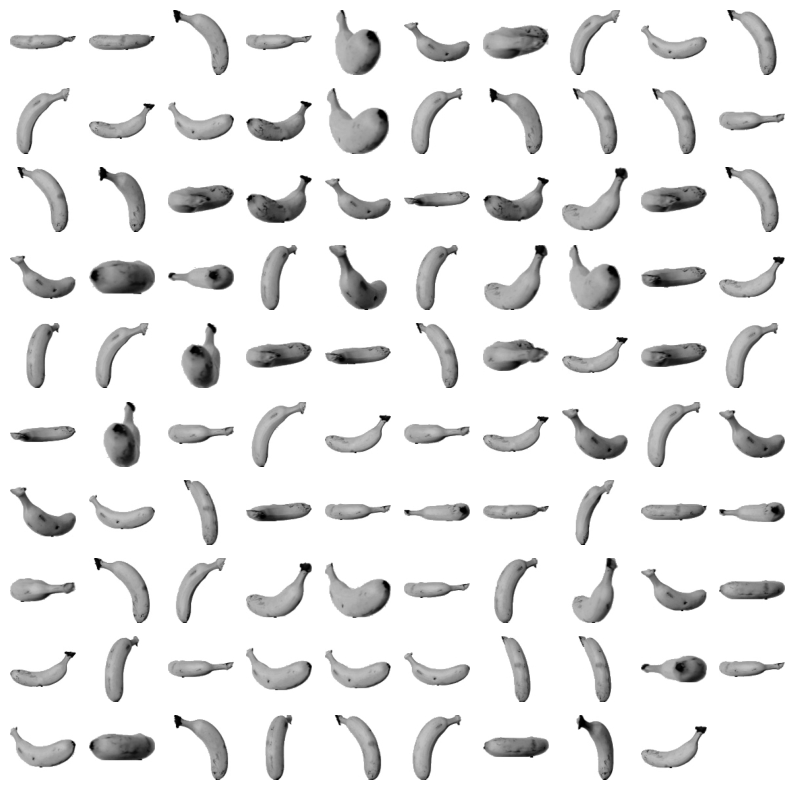

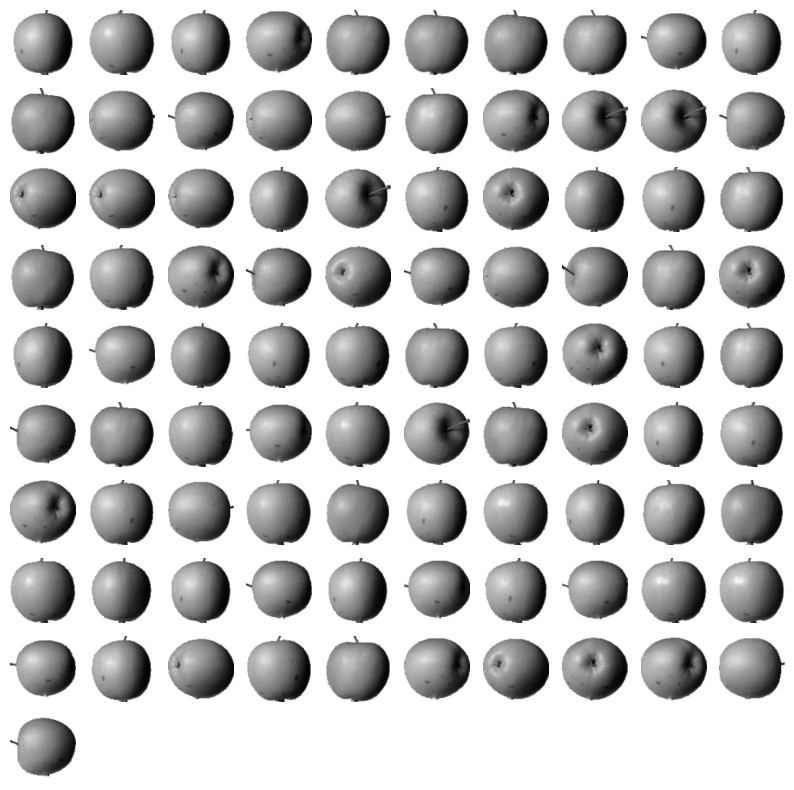

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

<차원 축소된 데이터들>


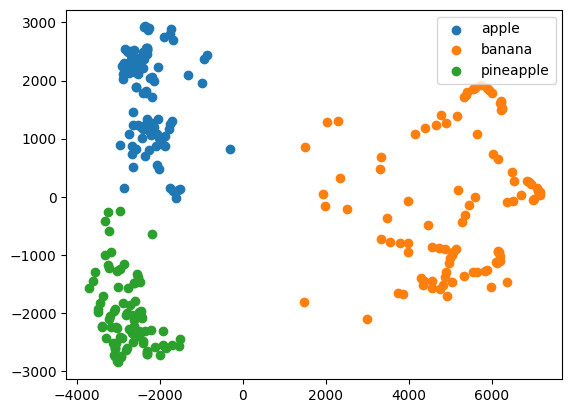

In [16]:
print('<차원 축소된 데이터들>')
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()